# Analyse des destinations et des populations attirées

On va s'intéresser aux fichiers :
* age_gender_bkts.csv
* countries.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Analyse du fichier age_gender_bkts.csv

On s'intéresse ici aux informations concernant la population des individus par mays selon la tranche d'âge et le sexe. La colonne "year" est supprimée car elle ne contient qu'une seule valeur (= 2015). On retrouve dans ce fichier la proportion d'utilisateur ayant 

In [10]:
# "Year" column is deleted because it's always equals to 2015
df = pd.read_csv('./data/age_gender_bkts.csv').drop('year', axis=1)
users = pd.read_csv('./data/train_users_2.csv')
df.head()

,age_bucket,country_destination,gender,population_in_thousands
0,100+,AU,male,1.0
1,95-99,AU,male,9.0
2,90-94,AU,male,47.0
3,85-89,AU,male,118.0
4,80-84,AU,male,199.0


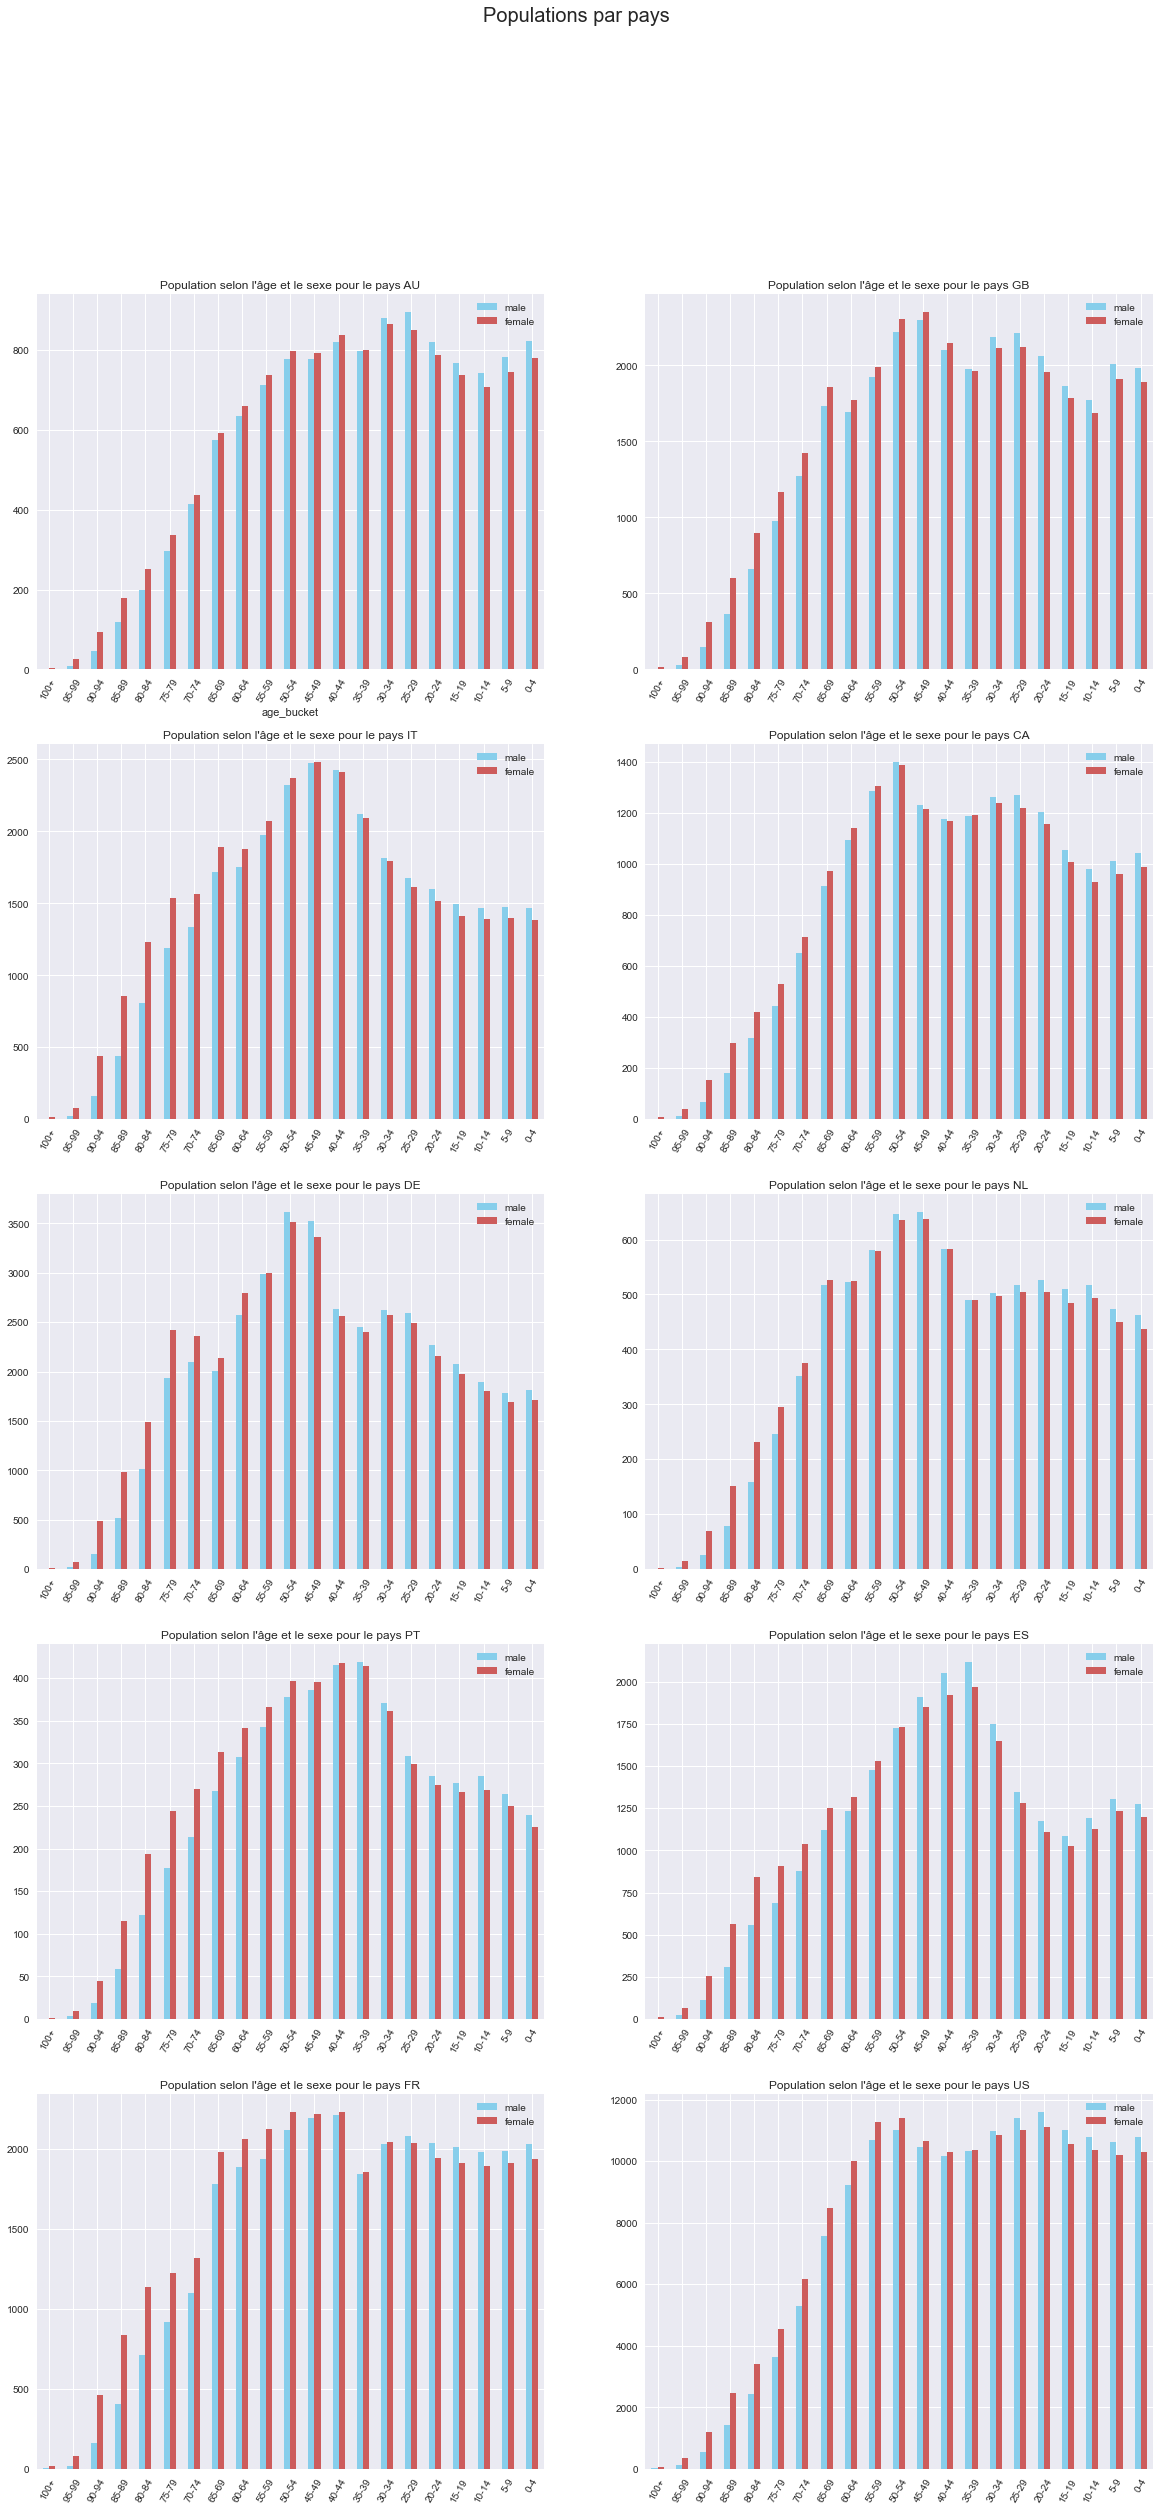

In [28]:
# Display population size by ages for each country
ages = df['age_bucket'].values[:21]
countries = df['country_destination'].unique()
fig, ax = plt.subplots(5, 2, figsize=(20, 40))
fig.suptitle('Populations par pays', fontsize=20)
for i, country in enumerate(countries):
    current_ax = ax[i%5][i%2]
    df_country = df[(df['country_destination'] == country)].set_index('age_bucket').drop('country_destination', axis=1)
    gender_country = pd.DataFrame({'male':df_country[df_country['gender']=='male']['population_in_thousands'], 
                                   'female': df_country[df_country['gender']=='female']['population_in_thousands']})
    gender_country.loc[ages].plot.bar(ax=current_ax, color=["SkyBlue","IndianRed"],
                                      title=f"Population selon l'âge et le sexe pour le pays {country}")
    current_ax.set_xticklabels(ages, rotation=60)


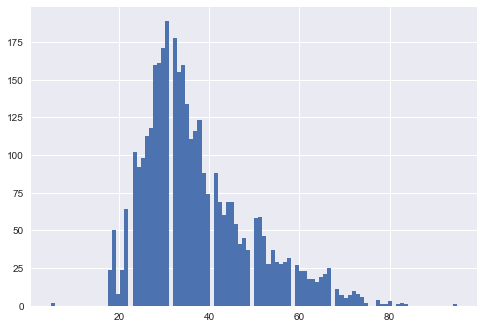

In [27]:
tmp = users[(users['country_destination'] == 'FR') & ~(users['age'].isnull()) & (users['age'] <= 100)]
tmp['age'].astype(int).hist(bins=100)